# Linear Regression
This notebook aims to evaluate different version of the linear regression to predict apartment pricing in Panama. To be precise:
- Simple Linear Regression
- Polynomial Regression
- Multiple Linear Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

## The data

In [7]:
df = pd.read_csv("data/data_scaled.csv")
df.head()

,scaled_y,y,scaled_x1,scaled_x2,scaled_x3,scaled_x4,x_2_dumm,x_3_dumm,x_4_dumm,x1
0,-0.053227,139.0000,-0.143087,-0.087855,-0.096478,-0.089952,0,0,0,58.00
1,-0.034211,233.2596,-0.119559,-0.087855,-0.096478,-0.089952,0,0,0,79.34
2,-0.052016,145.0000,-0.105601,-0.087855,-0.096478,-0.089952,0,0,0,92.00
3,-0.057463,118.0000,-0.134267,-0.087855,-0.096478,-0.089952,0,0,0,66.00
4,-0.056051,125.0000,-0.128754,-0.087855,-0.096478,-0.089952,0,0,0,71.00


In [8]:
y = df['scaled_y']
X = df[['scaled_x1', 'x_2_dumm', 'x_3_dumm', 'x_4_dumm']]

In [9]:
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
X_test, X_cross, y_test, y_cross = train_test_split(X_test_cross, y_test_cross, test_size=0.5,random_state=100)

In [11]:
print('y train vector size',  y_train.shape)
print('X train matrix size', X_train.shape)
print('- - * --'*3)
print('y test vector size',  y_test.shape)
print('X test matrix size', X_test.shape)
print('- - * --'*3)
print('y cross vector size',  y_cross.shape)
print('X cross matrix size', X_cross.shape)

y train vector size (5646,)
X train matrix size (5646, 4)
- - * --- - * --- - * --
y test vector size (1882,)
X test matrix size (1882, 4)
- - * --- - * --- - * --
y cross vector size (1882,)
X cross matrix size (1882, 4)


In [12]:
np.array(X_train['scaled_x1'])

array([ 0.06308693, -0.05267933,  0.11821372, ..., -0.11552388,
       -0.08134526, -0.13867713])

In [13]:
np.array(y_train)

array([ 0.00346063, -0.01933541,  0.05167528, ..., -0.05705984,
       -0.01873021, -0.05336809])

____________________________
# Linear Regression
Using 1 feature only ($y=wx+b$), where $x$ = scaled_x1

#### Training

In [14]:
linear_model = LinearRegression()

In [15]:
linear_model.fit(np.array(X_train['scaled_x1']).reshape(-1,1),
                 y_train)

LinearRegression()

In [16]:
print('intercept: ', linear_model.intercept_, 'coeff: ', linear_model.coef_)

intercept:  -0.00046807267499079794 coeff:  [0.43003871]


#### Predictions and Errors

In [96]:
yhat = linear_model.predict(np.array(X_test['scaled_x1']).reshape(-1,1))
yhat_cv = linear_model.predict(np.array(X_cross['scaled_x1']).reshape(-1,1))

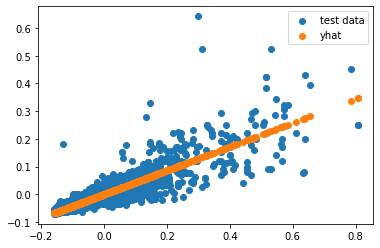

In [18]:
plt.scatter(X_test['scaled_x1'], y_test, label = 'test data')
plt.scatter(X_test['scaled_x1'], yhat, label = 'yhat')
plt.legend()

### Error

In [99]:
mse = mean_squared_error(y_test, yhat)
print('MSE test data: {}'.format(mse))
mse = mean_squared_error(y_cross, yhat_cv)
print('       MSE CV: {}'.format(mse))

MSE test data: 0.0013244814554887164
       MSE CV: 0.001785002539784452


_____________

## Polynomial Regression

In [109]:
def get_optim_poly_degree(deg_i, deg_f, X_train, y_train, X_test, y_test, X_cross, y_cross): 
    '''This function train a polynomial regression model from deg_i to deg_f. Also, it plots the cv, train, and test errors and
        returns a list of predictions by each degree
    '''
    # define list of error
    test_error = []
    # cv error
    cv_error = []
    # training error
    train_error = []
    
    # set max number of degree of polynomial we want to evaluate
    deg_ = list(range(deg_i,deg_f + 1))
    
    pred_list_by_deg = []
    
    for i in deg_:
        # define features according to he degree of the polynomial
        poly = PolynomialFeatures(degree=i, include_bias=False)
        # import pdb; pdb.set_trace()
        # Get transofrmation of features according to the degree of the polynomial
        X_poly_features = poly.fit_transform(np.array(X_train['scaled_x1']).reshape(-1,1))
        
        # instantiate the class lin reg
        polynomial_model = LinearRegression()
        # train/fit polynomial regression
        polynomial_model.fit(X_poly_features, y_train)

        # reshape cross and test data
        X_test_r = poly.fit_transform(np.array(X_test['scaled_x1']).reshape(-1,1))
        X_cross_r = poly.fit_transform(np.array(X_cross['scaled_x1']).reshape(-1,1))
        
        # get predictions
        yhat_test = polynomial_model.predict(X_test_r)
        yhat_cross = polynomial_model.predict(X_cross_r)
        yhat_train = polynomial_model.predict(X_poly_features)
        # print('degree: ', i, ' intercept: ', polynomial_model.intercept_, 'coeff: ', polynomial_model.coef_)
        
        
        # store predictions by deg
        pred_list_by_deg.append({i : yhat_test})

        # get mse
        mse_test = mean_squared_error(y_test, yhat_test)
        mse_cross = mean_squared_error(y_cross, yhat_cross)
        mse_train = mean_squared_error(y_train, yhat_train)
        print('Degree {} -> MSE: {}'.format(i, mse_test))
        print('       CV -> MSE: {}'.format(mse_cross))
        
        test_error.append(mse_test)
        cv_error.append(mse_cross)
        train_error.append(mse_train)
    # print(deg_, '\n', test_error, '\n', cv_error)
    plt.plot(deg_, test_error, label='Test Error')
    plt.plot(deg_, cv_error, label = 'Cross Validation Error')
    plt.plot(deg_, train_error, label = 'Train Error')
    plt.tight_layout()
    plt.legend(loc='upper center')
    
    
    return pred_list_by_deg          

### Training Prediction and Error

Degree 2 -> MSE: 0.0013239555666913377
       CV -> MSE: 0.0017768527447176502
Degree 3 -> MSE: 0.0013129230382199905
       CV -> MSE: 0.0017860120076157427
Degree 4 -> MSE: 0.0013127211468822175
       CV -> MSE: 0.001783191010303294
Degree 5 -> MSE: 0.0013128191798986234
       CV -> MSE: 0.0017849272985788352
Degree 6 -> MSE: 0.001308980754754342
       CV -> MSE: 0.0017917031347589412
Degree 7 -> MSE: 0.0013097955772416858
       CV -> MSE: 0.0017869451415814153
Degree 8 -> MSE: 0.0013109485141257727
       CV -> MSE: 0.0017890002268020075
Degree 9 -> MSE: 0.0013056202900842498
       CV -> MSE: 0.001725846279994075
Degree 10 -> MSE: 0.0013031708378799412
       CV -> MSE: 0.0017127663100853494


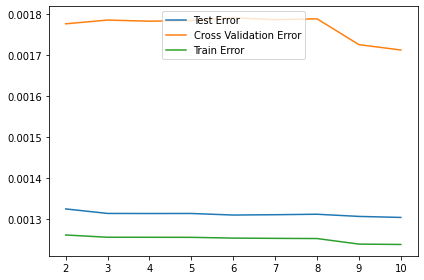

In [108]:
# Run Polynomial Regression Function
pred_list_by_deg = get_optim_poly_degree(2, 10, X_train, y_train, X_test, y_test, X_cross, y_cross)

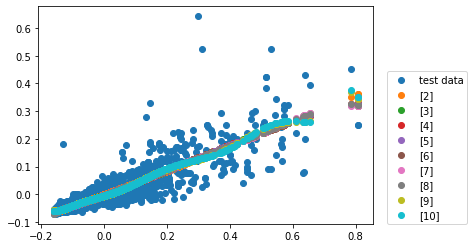

In [106]:
# Eval prediction of area vs price for different degrees of polynomial
plt.scatter(X_test['scaled_x1'], y_test, label = 'test data')
for j in pred_list_by_deg:
    plt.scatter(X_test['scaled_x1'], j.values(), label=list(j.keys()))
# plt.legend()
plt.legend(loc=(1.04, 0))

Evaluating the prediction it seems that after degree = 3 there is no significant change. However, it seems the flexibility of the model increases drastically and it start to learn the noise in the data. For this model and only using area as explanatory variable, I would recommend going with simpe linear gression at must 2nd degree polynomial

____

## Multiple Linear Regression

In [75]:
ml = LinearRegression()

### Training

In [76]:
ml.fit(X_train, y_train)

LinearRegression()

### Predictions and Error

In [77]:
yhat_ml = ml.predict(X_test)

In [86]:
yhat_ml_cross = ml.predict(X_cross)

In [97]:
mse_ml = mean_squared_error(y_test, yhat_ml)
print('MSE test data: {}'.format(mse_ml))
mse_ml_cross = mean_squared_error(y_cross, yhat_ml_cross)
print('MSE cross-v: {}'.format(mse_ml_cross))

MSE test data: 0.001334450219449617
MSE cross-v: 0.0017887709493486733


There is no significant improvement in the test prediction using all the other features

___
# Conclusion
It seems the more interpretable model provide a good estimation of the apartement pricing compare to the more complex model using linear regression approach. However as the application it's about money I suggest going with Polynomial regression at the 2nd degree as it provides lower error than the simple linear regression and miltiple regression

$$y=w_1x_1^2+w_2x_2+b $$
$$or$$
$$\vec{y}=\vec{w}\vec{x}+b$$
